#https://github.com/TheODDYSEY/Malaria-Detection-Model/tree/main

In [15]:
import cv2
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [16]:
img_dir="cell_images"  
img_size=70

def load_img_data(path):
    image_files = glob.glob(os.path.join(path, "Parasitized/*.png")) + \
                  glob.glob(os.path.join(path, "Uninfected/*.png"))
    X, y = [], []
    for image_file in image_files:
        # 0 for uninfected and 1 for infected
        label = 0 if "Uninfected" in image_file else 1
        # load the image in gray scale
        img_arr = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        # resize the image to (70x70)
        img_resized = cv2.resize(img_arr, (img_size, img_size))
        X.append(img_resized)
        y.append(label)
    return X, y

In [ ]:
# load the data
X, y = load_img_data(img_dir)
# reshape to (n_samples, 70, 70, 1) (to fit the NN)
X = np.array(X).reshape(-1, img_size, img_size, 1)
# scale pixels from the range [0, 255] to [0, 1] 
# to help the neural network learn much faster
X = X / 255 

# shuffle & split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
print("Total training samples:", X_train.shape)
print("Total validation samples:", X_test.shape[0])

In [26]:
# IMPLEMTING CNN 

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# train the model with 3 epochs, 64 batch size
epochs_num = 50
history = model.fit(X_train, np.array(y_train), batch_size=64, epochs=epochs_num, validation_split=0.2)
# if you already trained the model, uncomment below and comment above
# so you can only load the previously trained model
# model.load_weights("malaria-cell-cnn.h5")

c:\Users\zacha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 65s 198ms/step - accuracy: 0.6407 - loss: 0.6032 - val_accuracy: 0.9351 - val_loss: 0.1891
Epoch 2/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 60s 195ms/step - accuracy: 0.9331 - loss: 0.1908 - val_accuracy: 0.9415 - val_loss: 0.1783
Epoch 3/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.9419 - loss: 0.1594 - val_accuracy: 0.9403 - val_loss: 0.1686
Epoch 4/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.9459 - loss: 0.1495 - val_accuracy: 0.9440 - val_loss: 0.1621
Epoch 5/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 46s 147ms/step - accuracy: 0.9501 - loss: 0.1350 - val_accuracy: 0.9450 - val_loss: 0.1630
Epoch 6/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 37s 117ms/step - accuracy: 0.9558 - loss: 0.1206 - val_accuracy: 0.9454 - val_loss: 0.1490
Epoch 7/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.9618 - loss: 0.1032 - val_accuracy: 0.9448 - val_loss: 0.1638
Epoch 8/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 34s 111ms/step - accuracy: 0.9619 - loss: 0

In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 68, 68, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 68, 68, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 838,469 (3.20 MB)

 Trainable params: 279,489 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 558,980 (2.13 MB)

In [28]:
# MODEL EVALUATION
loss, accuracy = model.evaluate(X_test, np.array(y_test), verbose=0)
print(f"Testing on {len(X_test)} images, the results are\n Accuracy: {accuracy} | Loss: {loss}")

Testing on 2756 images, the results are
 Accuracy: 0.9408563375473022 | Loss: 0.6940311193466187


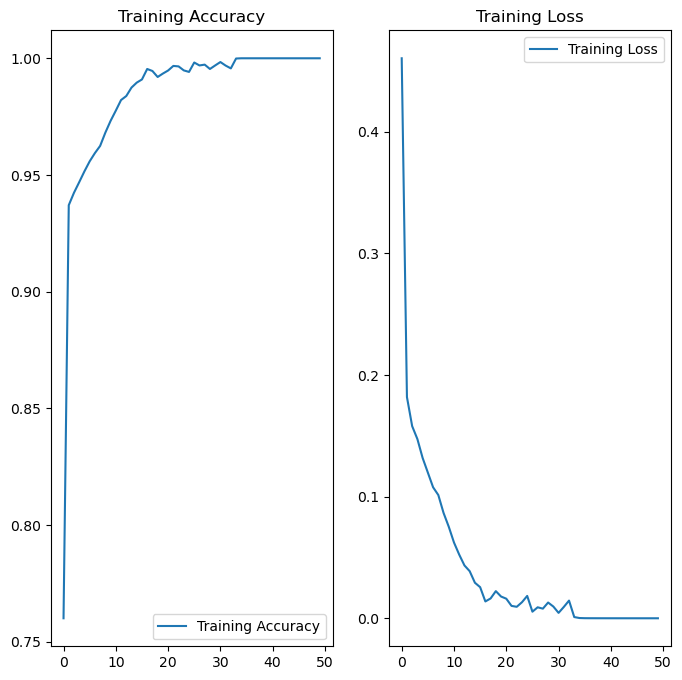

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(epochs_num)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

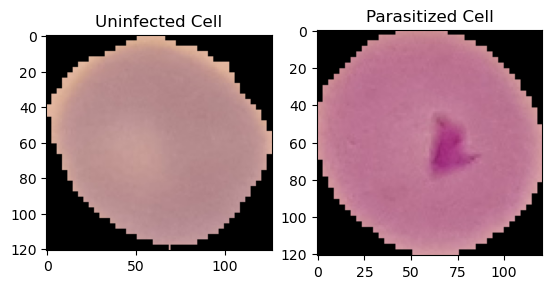

In [30]:
# testing some images
uninfected_cell = "cell_images/testing-samples/C1_thinF_IMG_20150604_104919_cell_82.png"
infected_cell = "cell_images/testing-samples/C38P3thinF_original_IMG_20150621_112116_cell_204.png"

_, ax = plt.subplots(1, 2)
ax[0].imshow(plt.imread(uninfected_cell))
ax[0].title.set_text("Uninfected Cell")
ax[1].imshow(plt.imread(infected_cell))
ax[1].title.set_text("Parasitized Cell")
plt.show()

In [31]:
# LOAD IMAGES FOR PROCESSING

img_arr_uninfected = cv2.imread(uninfected_cell, cv2.IMREAD_GRAYSCALE)
img_arr_infected = cv2.imread(infected_cell, cv2.IMREAD_GRAYSCALE)
# resize the images to (70x70)
img_arr_uninfected = cv2.resize(img_arr_uninfected, (img_size, img_size))
img_arr_infected = cv2.resize(img_arr_infected, (img_size, img_size))
# scale to [0, 1]
img_arr_infected = img_arr_infected / 255
img_arr_uninfected = img_arr_uninfected / 255
# reshape to fit the neural network dimensions
# (changing shape from (70, 70) to (1, 70, 70, 1))
img_arr_infected = img_arr_infected.reshape(1, *img_arr_infected.shape)
img_arr_infected = np.expand_dims(img_arr_infected, axis=3)
img_arr_uninfected = img_arr_uninfected.reshape(1, *img_arr_uninfected.shape)
img_arr_uninfected = np.expand_dims(img_arr_uninfected, axis=3)

In [32]:
# perform inference
infected_result = model.predict(img_arr_infected)[0][0]
uninfected_result = model.predict(img_arr_uninfected)[0][0]
print(f"Infected: {infected_result}")
print(f"Uninfected: {uninfected_result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Infected: 1.0
Uninfected: 8.797110548428976e-15


In [33]:
# save the model & weights
model.save("locally-trained-cnn.h5")